In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape

In [2]:
data = pd.read_csv(r"E:\DL\Deep Learning Datasets\3 MNIST\mnist_784_csv.csv")
print(data.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel782  pixel783  pixel784  class  
0         0         0

In [3]:
X = data.iloc[:,:-1].values / 255.0 #normalise pixel values
X = X.reshape(-1,28,28,1) #Reshape to 28×28×1

In [4]:
noise_factor = 0.5
X_noisy = X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape)
X_noisy = np.clip(X_noisy, 0., 1.)

In [5]:
input_img = Input(shape=(28,28,1))

In [6]:
x = Flatten()(input_img)
x = Dense(128,activation='relu')(x)
encoded = Dense(64,activation='relu')(x)

In [7]:
x = Dense(128,activation='relu')(encoded)
x = Dense(28*28,activation='sigmoid')(x)
decoded = Reshape((28,28,1))(x)

In [8]:
autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [9]:
autoencoder.fit(X_noisy,X,epochs=5,batch_size=32,shuffle=True,validation_split=0.2)

Epoch 1/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2131 - val_loss: 0.1385
Epoch 2/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1350 - val_loss: 0.1265
Epoch 3/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1251 - val_loss: 0.1216
Epoch 4/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1206 - val_loss: 0.1187
Epoch 5/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1175 - val_loss: 0.1167


In [10]:
denoised_images = autoencoder.predict(X_noisy)

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 758us/step


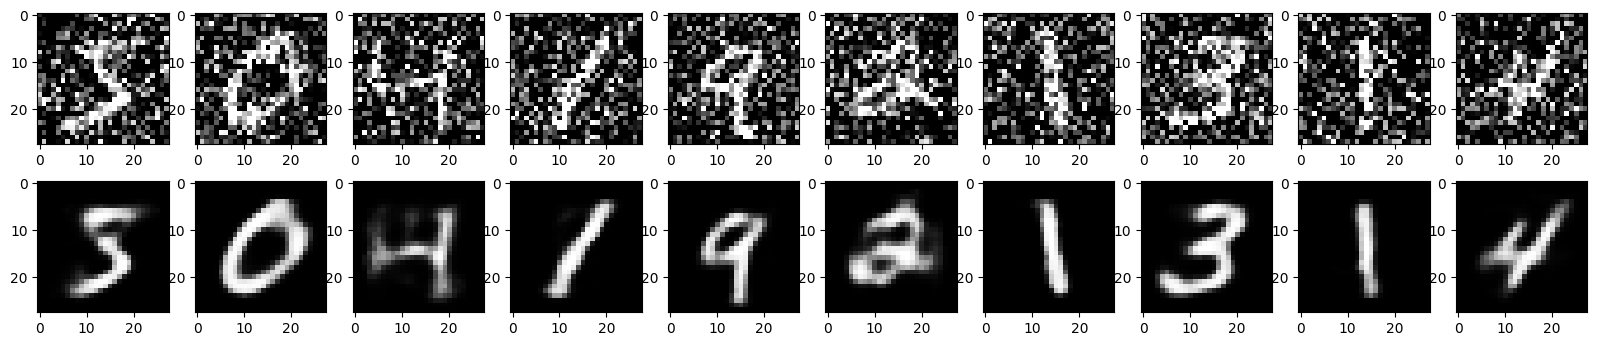

In [11]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_noisy[i].reshape(28,28),cmap='gray')
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(denoised_images[i].reshape(28,28),cmap='gray')
plt.show()